In [1]:
#%load_ext IPython.extensions.deduperreload
##%reload_ext autoreload
#%autoreload 2

In [2]:
%cd ../

/home/dmoreno/pipeline_v4_final/pipeline/training/stamp_classifier/models/experimentation/stamp_full


In [3]:
import pandas as pd
from get_data_from_db import get_database_engine
from get_data_from_db import get_detections
from alerce.core import Alerce
import requests
from notebooks.utils import *

## Consumir datos

In [4]:
df = pd.read_parquet('./data/stamp_classifier_2025_beta_firstmjd60814_SN.parquet', engine='pyarrow')
df.head()
df_og = df.copy()
df.head()

,oid,ndet,meanra,meandec,deltajd,firstmjd,lastmjd,step_id_corr,class_name_stamp_old,classifier_name_stamp_old,classifier_version_stamp_old,probability_stamp_old,class_name_stamp_new,classifier_name_stamp_new,classifier_version_stamp_new,probability_stamp_new
0,ZTF25aaqqncg,25,25.153132,43.859619,9.996597,60814.493982,60824.490579,27.5.6,bogus,stamp_classifier,stamp_classifier_1.0.4,0.783749,SN,stamp_classifier_2025_beta,beta,0.969263
1,ZTF25aaqqmcb,9,18.780834,38.598613,9.996424,60814.489132,60824.485556,27.5.6,bogus,stamp_classifier,stamp_classifier_1.0.4,0.748484,SN,stamp_classifier_2025_beta,beta,0.615267
2,ZTF25aaqqlys,28,7.640684,22.299256,9.991875,60814.486285,60824.478160,27.5.6,bogus,stamp_classifier,stamp_classifier_1.0.4,0.759786,SN,stamp_classifier_2025_beta,beta,0.922652
3,ZTF19abjarlo,26,5.903281,16.055791,9.999711,60814.477986,60824.477697,27.5.6,SN,stamp_classifier,stamp_classifier_1.0.4,0.526442,SN,stamp_classifier_2025_beta,beta,0.991502
4,ZTF25aaqpzbl,9,332.699920,5.861327,10.040845,60814.420914,60824.461759,27.5.6,SN,stamp_classifier,stamp_classifier_1.0.4,0.792763,SN,stamp_classifier_2025_beta,beta,0.999278


In [5]:
oids = df.oid.values[:]
oids = [f"'{oid}'" for oid in oids]

ENVIRONMENT = "production"
engine = get_database_engine(environment=ENVIRONMENT, read=True)
engine.begin()
detections = get_detections(oids, engine, rb_filter=False)
detections = detections[detections.has_stamp]
detections.sort_values('mjd', inplace=True)
detections[detections.mjd<60815]

Available Tables:
 ['outlier', 'feature_version', 'gaia_ztf', 'ss_ztf', 'allwise', 'non_detection', 'lc_classifier_top', 'lc_classifier_periodic', 'stamp_classifier', 'alembic_version', 'step', 'taxonomy', 'feature', 'pipeline', 'reference', 'lc_classifier_bhrf_forced_phot_periodic', 'lc_classifier_bhrf_forced_phot_stochastic', 'lc_classifier_bhrf_forced_phot_transient', 'forced_photometry', 'lc_classifier_bhrf_forced_phot_top', 'lc_classifier_transient', 'magstat', 'lc_classifier', 'stamp_classifier_2025_beta', 'dataquality', 'object', 'lc_classifier_stochastic', 'lc_classifier_beta', 'lc_classifier_bhrf_forced_phot', 'ps1_ztf', 'xmatch', 'lc_classifier_bhrf_forced_phot_childs', 'detection', 'probability']


,oid,candid,mjd,fid,pid,diffmaglim,isdiffpos,nid,ra,dec,...,sigmagapbig,rfid,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext,corrected,dubious,parent_candid,has_stamp,step_id_corr
75,ZTF25aaqomdp,3060276310215015008,60814.276319,1,3060276310215,20.097801,1,3060,183.264107,22.915655,...,0.1815,6.241201e+08,NaN,NaN,NaN,False,False,NaN,True,27.5.6
77,ZTF25aaqomlr,3060277804715015033,60814.277801,1,3060277804715,19.699880,1,3060,145.893806,40.765214,...,0.3629,7.111201e+08,NaN,NaN,NaN,False,True,NaN,True,27.5.6
78,ZTF25aaqommt,3060278274715015004,60814.278276,1,3060278274715,19.850525,1,3060,153.424520,48.345893,...,0.5792,7.521201e+08,NaN,NaN,NaN,False,True,NaN,True,27.5.6
81,ZTF25aaqompw,3060278744215015011,60814.278750,1,3060278744215,19.803247,1,3060,156.835737,55.414955,...,0.1911,7.871201e+08,NaN,NaN,NaN,False,True,NaN,True,27.5.6
87,ZTF25aaqomro,3060278744315015011,60814.278750,1,3060278744315,19.800554,1,3060,157.283157,55.101706,...,0.2111,7.871201e+08,NaN,NaN,NaN,False,True,NaN,True,27.5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,ZTF25aaqqmop,3060492552615015011,60814.492558,2,3060492552615,18.570877,1,3060,14.554877,42.756375,...,0.3792,1.736120e+09,NaN,NaN,NaN,False,False,NaN,True,27.5.6
1569,ZTF25aaqqncg,3060493982415015031,60814.493982,2,3060493982415,17.856308,1,3060,25.153091,43.859624,...,0.2753,1.737120e+09,17.360525,0.094182,0.094261,True,False,NaN,True,27.5.6
1566,ZTF25aaqqmsi,3060494470815015006,60814.494479,2,3060494470815,18.522564,1,3060,11.895626,48.741138,...,0.7145,1.775120e+09,NaN,NaN,NaN,False,False,NaN,True,27.5.6
1567,ZTF25aaqqnbs,3060495524915015032,60814.495521,2,3060495524915,17.989119,1,3060,11.578585,26.061452,...,0.4317,1.597120e+09,NaN,NaN,NaN,False,True,NaN,True,27.5.6


In [6]:
detections.columns

Index(['oid', 'candid', 'mjd', 'fid', 'pid', 'diffmaglim', 'isdiffpos', 'nid',
       'ra', 'dec', 'magpsf', 'sigmapsf', 'magap', 'sigmagap', 'distnr', 'rb',
       'rbversion', 'drb', 'drbversion', 'magapbig', 'sigmagapbig', 'rfid',
       'magpsf_corr', 'sigmapsf_corr', 'sigmapsf_corr_ext', 'corrected',
       'dubious', 'parent_candid', 'has_stamp', 'step_id_corr'],
      dtype='object')

In [7]:
def read_avro(oid, candid):
    url_avro = 'https://avro.alerce.online/get_avro_info?oid=' + str(oid) + '&candid=' + str(candid)
    resp = requests.request(url=url_avro, method='GET')
    return resp

alerce_client = Alerce()
df = pd.DataFrame()

cols = ['candid', 'ra', 'dec',
        'magpsf', 'sigmapsf', 'isdiffpos',
        'diffmaglim', 'classtar', 'fwhm',
        'sgscore1', 'sgscore2', 'sgscore3',
        'distpsnr1', 'distpsnr2', 'distpsnr3',
        'ndethist', 'ncovhist', 'chinr', 'sharpnr'] #jd, ssdistnr,isdiffpos me faltan

for col in cols:
    df[col] = None
oids2 = []
lista_oids = []
for oid in oids:
    candid = detections[detections.oid == oid.strip("'")].candid.values
    if candid.shape[0] == 0:
        lista_oids.append(oid)
        continue
    candid = candid[0]
    oids2.append(oid)
    stamps = alerce_client.get_stamps(oid, candid)
    science, ref, difference = stamps[0].data, stamps[1].data, stamps[2].data
    
    cols_stamp = ['science', 'reference', 'diff']
    obj = {'oid': oid}
    for j, name in enumerate(cols_stamp):
        obj[name] = [stamps[j].data.byteswap().view(stamps[j].data.byteswap().dtype.newbyteorder())]
    df = pd.concat([df, pd.DataFrame(obj)], ignore_index=True)

    resp = read_avro(oid, candid)
    #display(resp.status_code)
    
    if resp.status_code == 200:
        resp = resp.json()
        
    for col in cols:
        df.loc[df['oid'] == oid, col] = resp['candidate'][col]
    df[['ra','dec']] = df[['ra','dec']].astype(float)
df.head()
oids = oids2

In [8]:
df

,candid,ra,dec,magpsf,sigmapsf,isdiffpos,diffmaglim,classtar,fwhm,sgscore1,...,distpsnr2,distpsnr3,ndethist,ncovhist,chinr,sharpnr,oid,science,reference,diff
0,3060493982415015031,25.153091,43.859624,17.384464,0.096363,t,17.856308,1.0,4.48,0.5,...,9.684708,13.854599,1,4232,3.386,0.488,'ZTF25aaqqncg',"[[357.63672, 370.00098, 363.46094, 383.46973, ...","[[360.51163, 361.28806, 360.6447, 360.36313, 3...","[[-2.5353675, 4.524429, 3.9984815, 18.700296, ..."
1,3060489134115015002,18.780895,38.598633,18.843658,0.191693,t,18.695026,0.959,1.463208,1.0,...,7.990725,22.456993,1,313,0.579,-0.033,'ZTF25aaqqmcb',"[[259.1941, 298.25122, 265.2058, 305.87305, 24...","[[264.56293, 263.4999, 263.81665, 265.84186, 2...","[[-8.044159, 34.135082, -1.8801003, 41.03674, ..."
2,3060486282515015002,7.640819,22.299308,19.169945,0.191345,t,18.997227,0.955,4.2,0.030833,...,7.636196,18.016426,1,2012,1.037,0.063,'ZTF25aaqqlys',"[[148.12598, 156.34412, 172.22339, 119.619995,...","[[152.29463, 149.08484, 148.8748, 150.26053, 1...","[[-4.033482, 10.309769, 22.37847, -20.022255, ..."
3,3060484674715015004,5.903405,16.055986,19.08963,0.190222,t,19.092031,0.969,3.68,0.00225,...,2.68863,4.361499,112,2030,1.087,0.048,'ZTF19abjarlo',"[[152.46716, 136.40454, 124.61072, 174.70105, ...","[[153.73677, 150.51335, 146.39339, 147.51881, ...","[[-0.41995475, -14.362872, -21.295073, 25.8558..."
4,3060420913315015010,332.699892,5.861284,18.640308,0.087633,t,19.365599,0.982,2.95,0.5,...,7.311393,8.376842,1,1543,8.349,0.968,'ZTF25aaqpzbl',"[[120.77875, 108.11975, 153.34576, 106.94879, ...","[[130.38007, 129.69154, 129.4728, 130.11423, 1...","[[-8.81582, -21.536238, 24.532125, -19.291397,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,3060278744315015003,157.446580,55.765790,19.177732,0.168594,t,19.800554,0.621,5.92,0.004167,...,21.166271,21.995876,1,2798,0.726,-0.376,'ZTF25aaqomrj',"[[171.73294, 173.55493, 166.68356, 182.85382, ...","[[168.34567, 171.22499, 171.49261, 169.75699, ...","[[4.5400414, 0.744071, -0.15739587, 8.351831, ..."
1336,3060278744215015011,156.835737,55.414955,19.692469,0.21168,t,19.803247,0.918,6.2,0.000833,...,26.298843,-999.0,1,2943,0.527,-0.272,'ZTF25aaqompw',"[[162.22876, 165.48245, 170.4454, 154.55579, 1...","[[160.35767, 162.28308, 162.86081, 161.42805, ...","[[3.2479854, 0.93505085, 9.534031, -7.508344, ..."
1337,3060278744715015021,153.893988,55.137045,19.210068,0.167329,t,19.840748,0.635,5.2,0.5,...,6.81459,15.926675,1,5366,3.12,0.157,'ZTF25aaqomnq',"[[157.46027, 142.42722, 164.01337, 153.76416, ...","[[153.23105, 154.45256, 156.063, 156.33965, 15...","[[0.18195322, -10.044236, 3.8135884, 0.1867181..."
1338,3060278274715015004,153.424520,48.345893,19.787155,0.206858,t,19.850525,0.816,2.74,0.984375,...,15.925574,20.447773,1,2882,0.798,-0.473,'ZTF25aaqommt',"[[81.75925, 94.64755, 87.68033, 97.182526, 99....","[[96.44252, 97.052864, 95.86814, 94.708336, 95...","[[-14.440532, -2.0463927, -11.413828, -2.24406..."


In [10]:
df.to_pickle('ale_data.pkl')

In [ ]:
df = pd.read_parquet('ale_data.parquet')
df.shape

In [9]:
df.isna().sum()

candid        0
ra            0
dec           0
magpsf        0
sigmapsf      0
isdiffpos     0
diffmaglim    0
classtar      0
fwhm          0
sgscore1      0
sgscore2      0
sgscore3      0
distpsnr1     0
distpsnr2     0
distpsnr3     0
ndethist      0
ncovhist      0
chinr         0
sharpnr       0
oid           0
science       0
reference     0
diff          0
dtype: int64

In [11]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

coords = SkyCoord(ra=df['ra'],
                  dec=df['dec'],
                  unit=(u.deg, u.deg))
df['gal_l'] = coords.galactic.l
df['gal_b'] = coords.galactic.b

# Barycentric mean ecliptic (used in ephem package)
df['ecl_long'] = coords.barycentricmeanecliptic.lon.value
df['ecl_lat'] = coords.barycentricmeanecliptic.lat.value

df['non_detections'] = df['ncovhist'] - df['ndethist']
df['oid'] = df['oid'].str.strip("'")
#df

gal_plane_l = np.linspace(0., 360., 360)
gal_plane_b = 0. * gal_plane_l
gal_plane_coords = SkyCoord(l=gal_plane_l,
                            b=gal_plane_b,
                            unit=(u.deg, u.deg),
                            frame='galactic')
gal_plane_ra = gal_plane_coords.icrs.ra.value
gal_plane_dec = gal_plane_coords.icrs.dec.value

ecl_plane_lon = np.linspace(0., 360., 360)
ecl_plane_lat = 0. * ecl_plane_lon

## Geocentric mean ecliptic
#ecl_plane_coords = SkyCoord(lon=ecl_plane_lon,
#                            lat=ecl_plane_lat,
#                            unit=(u.deg, u.deg),
#                            frame='geocentricmeanecliptic')
# Barycentric mean ecliptic (used in ephem package)
ecl_plane_coords = SkyCoord(lon=ecl_plane_lon,
                            lat=ecl_plane_lat,
                            unit=(u.deg, u.deg),
                            frame='barycentricmeanecliptic')

ecl_plane_ra = ecl_plane_coords.icrs.ra.value
ecl_plane_dec = ecl_plane_coords.icrs.dec.value

In [12]:
metadata_cols = ['candid', 'ra', 'dec', 'gal_l', 'gal_b', 'ecl_long', 'ecl_lat',
                'magpsf', 'sigmapsf', 'isdiffpos', 'diffmaglim', 'classtar', 'fwhm',
                'sgscore1', 'sgscore2', 'sgscore3', 'distpsnr1', 'distpsnr2',
                'distpsnr3', 'ndethist', 'ncovhist', 'chinr', 'sharpnr',
                'non_detections']

df_metadata = df[['oid'] + list(metadata_cols)].set_index('oid')
df_metadata['isdiffpos'] = df_metadata['isdiffpos'].replace({'f': -1, 't': 1})
df_metadata

/tmp/ipykernel_2718346/1677216651.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_metadata['isdiffpos'] = df_metadata['isdiffpos'].replace({'f': -1, 't': 1})


,candid,ra,dec,gal_l,gal_b,ecl_long,ecl_lat,magpsf,sigmapsf,isdiffpos,...,sgscore2,sgscore3,distpsnr1,distpsnr2,distpsnr3,ndethist,ncovhist,chinr,sharpnr,non_detections
oid,,,,,,,,,,,,,,,,,,,,,
ZTF25aaqqncg,3060493982415015031,25.153091,43.859624,132.228123,-18.122714,40.467855,30.918026,17.384464,0.096363,1,...,0.5,0.5,3.313066,9.684708,13.854599,1,4232,3.386,0.488,4231
ZTF25aaqqmcb,3060489134115015002,18.780895,38.598633,127.996837,-24.040067,32.918115,28.183335,18.843658,0.191693,1,...,0.96925,0.99375,4.270331,7.990725,22.456993,1,313,0.579,-0.033,312
ZTF25aaqqlys,3060486282515015002,7.640819,22.299308,116.595417,-40.315469,16.049452,17.409550,19.169945,0.191345,1,...,0.849042,0.0,0.552557,7.636196,18.016426,1,2012,1.037,0.063,2011
ZTF19abjarlo,3060484674715015004,5.903405,16.055986,113.235360,-46.291241,11.857559,12.382545,19.08963,0.190222,1,...,0.5,0.110667,0.87025,2.68863,4.361499,112,2030,1.087,0.048,1918
ZTF25aaqpzbl,3060420913315015010,332.699892,5.861284,67.226828,-39.054049,336.848596,15.972780,18.640308,0.087633,1,...,0.10503,0.47528,4.396629,7.311393,8.376842,1,1543,8.349,0.968,1542
ZTF25aarqnde,3065414971315015002,330.652819,8.947216,68.357478,-35.471613,336.058092,19.588919,19.495771,0.189522,1,...,0.993917,0.5,1.422466,13.379758,19.687456,6,3292,6.808,0.566,3286
ZTF25aaqqahc,3060424785415015007,338.068385,35.498450,93.450177,-19.284609,356.362943,40.822623,19.712729,0.204908,1,...,0.915417,0.00275,1.016806,7.522274,15.50304,1,2952,2.976,0.16,2951
ZTF25aaqqcld,3060429961415015017,340.699810,51.503831,103.455042,-6.436936,11.784228,53.120903,19.439451,0.172502,1,...,0.562875,0.647369,2.408701,4.374619,4.927113,2,4034,0.51,-0.155,4032
ZTF25aaqoygq,3060330283915015011,262.774268,40.988820,66.224654,31.991378,257.439943,64.113386,20.280502,0.216505,1,...,0.5,0.024375,1.25124,2.136882,2.350108,1,5232,1.615,0.097,5231


In [13]:
stamps = df[['oid', 'candid', 'ra', 'dec', 'science', 'reference', 'diff']].set_index('oid')
stamps

,candid,ra,dec,science,reference,diff
oid,,,,,,
ZTF25aaqqncg,3060493982415015031,25.153091,43.859624,"[[357.63672, 370.00098, 363.46094, 383.46973, ...","[[360.51163, 361.28806, 360.6447, 360.36313, 3...","[[-2.5353675, 4.524429, 3.9984815, 18.700296, ..."
ZTF25aaqqmcb,3060489134115015002,18.780895,38.598633,"[[259.1941, 298.25122, 265.2058, 305.87305, 24...","[[264.56293, 263.4999, 263.81665, 265.84186, 2...","[[-8.044159, 34.135082, -1.8801003, 41.03674, ..."
ZTF25aaqqlys,3060486282515015002,7.640819,22.299308,"[[148.12598, 156.34412, 172.22339, 119.619995,...","[[152.29463, 149.08484, 148.8748, 150.26053, 1...","[[-4.033482, 10.309769, 22.37847, -20.022255, ..."
ZTF19abjarlo,3060484674715015004,5.903405,16.055986,"[[152.46716, 136.40454, 124.61072, 174.70105, ...","[[153.73677, 150.51335, 146.39339, 147.51881, ...","[[-0.41995475, -14.362872, -21.295073, 25.8558..."
ZTF25aaqpzbl,3060420913315015010,332.699892,5.861284,"[[120.77875, 108.11975, 153.34576, 106.94879, ...","[[130.38007, 129.69154, 129.4728, 130.11423, 1...","[[-8.81582, -21.536238, 24.532125, -19.291397,..."
ZTF25aarqnde,3065414971315015002,330.652819,8.947216,"[[129.40395, 140.2192, 138.73454, 135.52055, 1...","[[137.1872, 137.62929, 138.77817, 138.46318, 1...","[[-7.6745906, 1.0488302, 4.186704, -3.3362556,..."
ZTF25aaqqahc,3060424785415015007,338.068385,35.498450,"[[167.17444, 179.6388, 175.85379, 179.09277, 1...","[[169.89845, 171.52417, 171.99918, 172.64532, ...","[[-7.4500785, 7.3733673, 4.9118214, 5.8608046,..."
ZTF25aaqqcld,3060429961415015017,340.699810,51.503831,"[[231.31131, 214.52911, 221.11606, 250.97125, ...","[[221.77644, 225.30643, 225.66942, 225.23096, ...","[[9.117139, -9.542336, -6.895985, 27.300182, 0..."
ZTF25aaqoygq,3060330283915015011,262.774268,40.988820,"[[85.02933, 88.07637, 86.15908, 83.47705, 96.0...","[[88.94245, 89.335655, 84.94352, 85.656166, 85...","[[-2.7082443, -3.3585193, 0.6437218, -2.548742..."


## Sin metadatos (Stamp Ignacio)

In [14]:
from alerce_classifiers.stamp_full.mapper import StampFullMapper
from alerce_classifiers.stamp_full.model import StampClassifierFull

model_ig = StampClassifierFull(
    model_path='./model_ignacio.keras',
    mapper=StampFullMapper(),
)

model_ig.model.summary()

2025-06-05 17:21:12.642657: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "stamp_model_full"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (10, 63, 63, 37)       │         2,035 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (10, 32, 32, 60)       │        20,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (10, 16, 16, 29)       │        15,689 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (10, 8, 8, 26)         │         6,812 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (10, 3)                │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (10, 1664)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (10, 31)               │        51,708 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (10, 6)                │           192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,488 (376.91 KB)

 Trainable params: 96,482 (376.88 KB)

 Non-trainable params: 6 (24.00 B)

In [15]:
from alerce_classifiers.base.factories import input_dto_factory

input_dto = input_dto_factory(
    detections=pd.DataFrame(), 
    non_detections=pd.DataFrame(), 
    features=pd.DataFrame(), 
    xmatch=pd.DataFrame(), 
    stamps=stamps
)

In [16]:
predictions = model_ig.predict(input_dto)
pred_prob = predictions.probabilities
pred_prob

,AGN,asteroid,bogus,satellite,SN,VS
oid,,,,,,
ZTF25aaqqncg,0.000007,5.715758e-04,0.045712,0.000052,0.953637,2.104923e-05
ZTF25aaqqmcb,0.000100,1.419863e-04,0.932949,0.000442,0.065138,1.230367e-03
ZTF25aaqqlys,0.000800,1.812613e-01,0.033285,0.000809,0.783476,3.685927e-04
ZTF19abjarlo,0.041372,1.307057e-04,0.008695,0.000065,0.949182,5.561283e-04
ZTF25aaqpzbl,0.000004,4.312448e-06,0.000865,0.000006,0.999121,6.562007e-07
ZTF25aarqnde,0.001521,1.400462e-05,0.002371,0.000041,0.995979,7.316705e-05
ZTF25aaqqahc,0.000066,1.837228e-06,0.001388,0.000019,0.998505,1.931186e-05
ZTF25aaqqcld,0.000003,3.396091e-05,0.001359,0.000025,0.998562,1.737996e-05
ZTF25aaqoygq,0.000002,1.067131e-05,0.000797,0.000004,0.999186,2.986724e-07


### Gráficos Ale (Comparacion con PPT)

In [17]:
#aqui necesito definir la funcion para entregar las preds
def find_probs_r1(oids,pred_df):
    #recibo la lista de oids y hago las predicciones.
    #las predicciones ya estan en pred_prob, tomo el elemento maximo y el nombre de la clase

    df = pred_df.loc[oids].copy()
    #display(df.idxmax(axis=1))
    #display(df.max(axis=1))

    # Encontrar la clase con mayor probabilidad y su valor
    clase = df.idxmax(axis=1)
    prob = df.max(axis=1)

    df['class_name_stamp_new'] = clase
    df['classifier_name_stamp_new'] = 'stamp'
    df['classifier_version_stamp_new'] = 'stamp_classifier_1.0.4'
    df['probability_stamp_new'] = prob
    
    return df[['class_name_stamp_new','classifier_name_stamp_new','classifier_version_stamp_new','probability_stamp_new']]

#
df_aux = df_og.set_index('oid').drop(['class_name_stamp_new','classifier_name_stamp_new',
                                       'classifier_version_stamp_new','probability_stamp_new'],axis=1)
# Obtener predicciones
preds = find_probs_r1(oids=[oid.strip("'") for oid in oids],pred_df = pred_prob)
# Hacer join por índice (oid)
df_final_og = df_aux.join(preds, how='left')
df_final_og

,ndet,meanra,meandec,deltajd,firstmjd,lastmjd,step_id_corr,class_name_stamp_old,classifier_name_stamp_old,classifier_version_stamp_old,probability_stamp_old,class_name_stamp_new,classifier_name_stamp_new,classifier_version_stamp_new,probability_stamp_new
oid,,,,,,,,,,,,,,,
ZTF25aaqqncg,25,25.153132,43.859619,9.996597,60814.493982,60824.490579,27.5.6,bogus,stamp_classifier,stamp_classifier_1.0.4,0.783749,SN,stamp,stamp_classifier_1.0.4,0.953637
ZTF25aaqqmcb,9,18.780834,38.598613,9.996424,60814.489132,60824.485556,27.5.6,bogus,stamp_classifier,stamp_classifier_1.0.4,0.748484,bogus,stamp,stamp_classifier_1.0.4,0.932949
ZTF25aaqqlys,28,7.640684,22.299256,9.991875,60814.486285,60824.478160,27.5.6,bogus,stamp_classifier,stamp_classifier_1.0.4,0.759786,SN,stamp,stamp_classifier_1.0.4,0.783476
ZTF19abjarlo,26,5.903281,16.055791,9.999711,60814.477986,60824.477697,27.5.6,SN,stamp_classifier,stamp_classifier_1.0.4,0.526442,SN,stamp,stamp_classifier_1.0.4,0.949182
ZTF25aaqpzbl,9,332.699920,5.861327,10.040845,60814.420914,60824.461759,27.5.6,SN,stamp_classifier,stamp_classifier_1.0.4,0.792763,SN,stamp,stamp_classifier_1.0.4,0.999121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF25aaqomrj,1,157.446580,55.765790,0.000000,60814.278750,60814.278750,27.5.6,bogus,stamp_classifier,stamp_classifier_1.0.4,0.733461,NaN,NaN,NaN,NaN
ZTF25aaqompw,1,156.835737,55.414955,0.000000,60814.278750,60814.278750,27.5.6,bogus,stamp_classifier,stamp_classifier_1.0.4,0.756680,NaN,NaN,NaN,NaN
ZTF25aaqomnq,1,153.893988,55.137045,0.000000,60814.278750,60814.278750,27.5.6,bogus,stamp_classifier,stamp_classifier_1.0.4,0.695921,NaN,NaN,NaN,NaN


In [18]:
df_final_og.class_name_stamp_new.value_counts()

class_name_stamp_new
SN       9
bogus    1
Name: count, dtype: int64

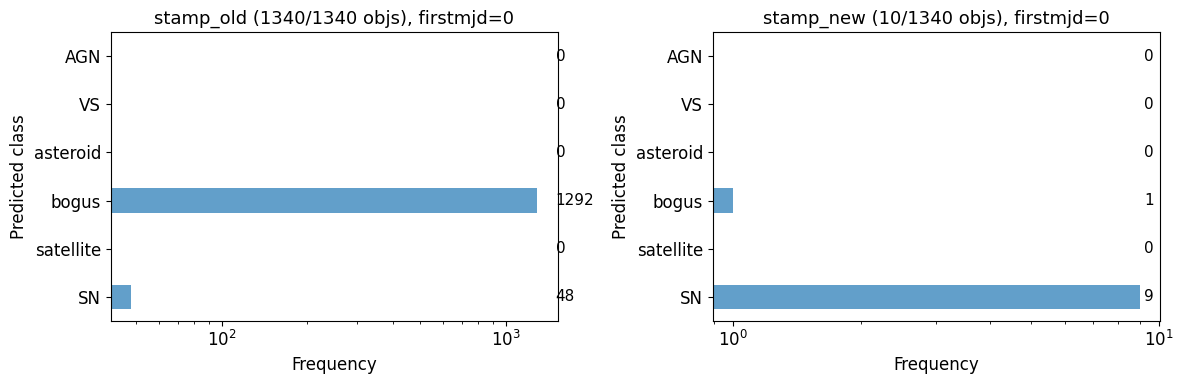

In [19]:
cls_sort_new = ['SN', 'satellite', 'bogus', 'asteroid', 'VS', 'AGN']
cls_map_sort_new = find_cl_map(cls_sort_new)
fontsize = 12
plot_2distribs_cls(df=df_final_og, labels_pred_map=cls_map_sort_new, fontsize=fontsize,firstmjd_min='0')

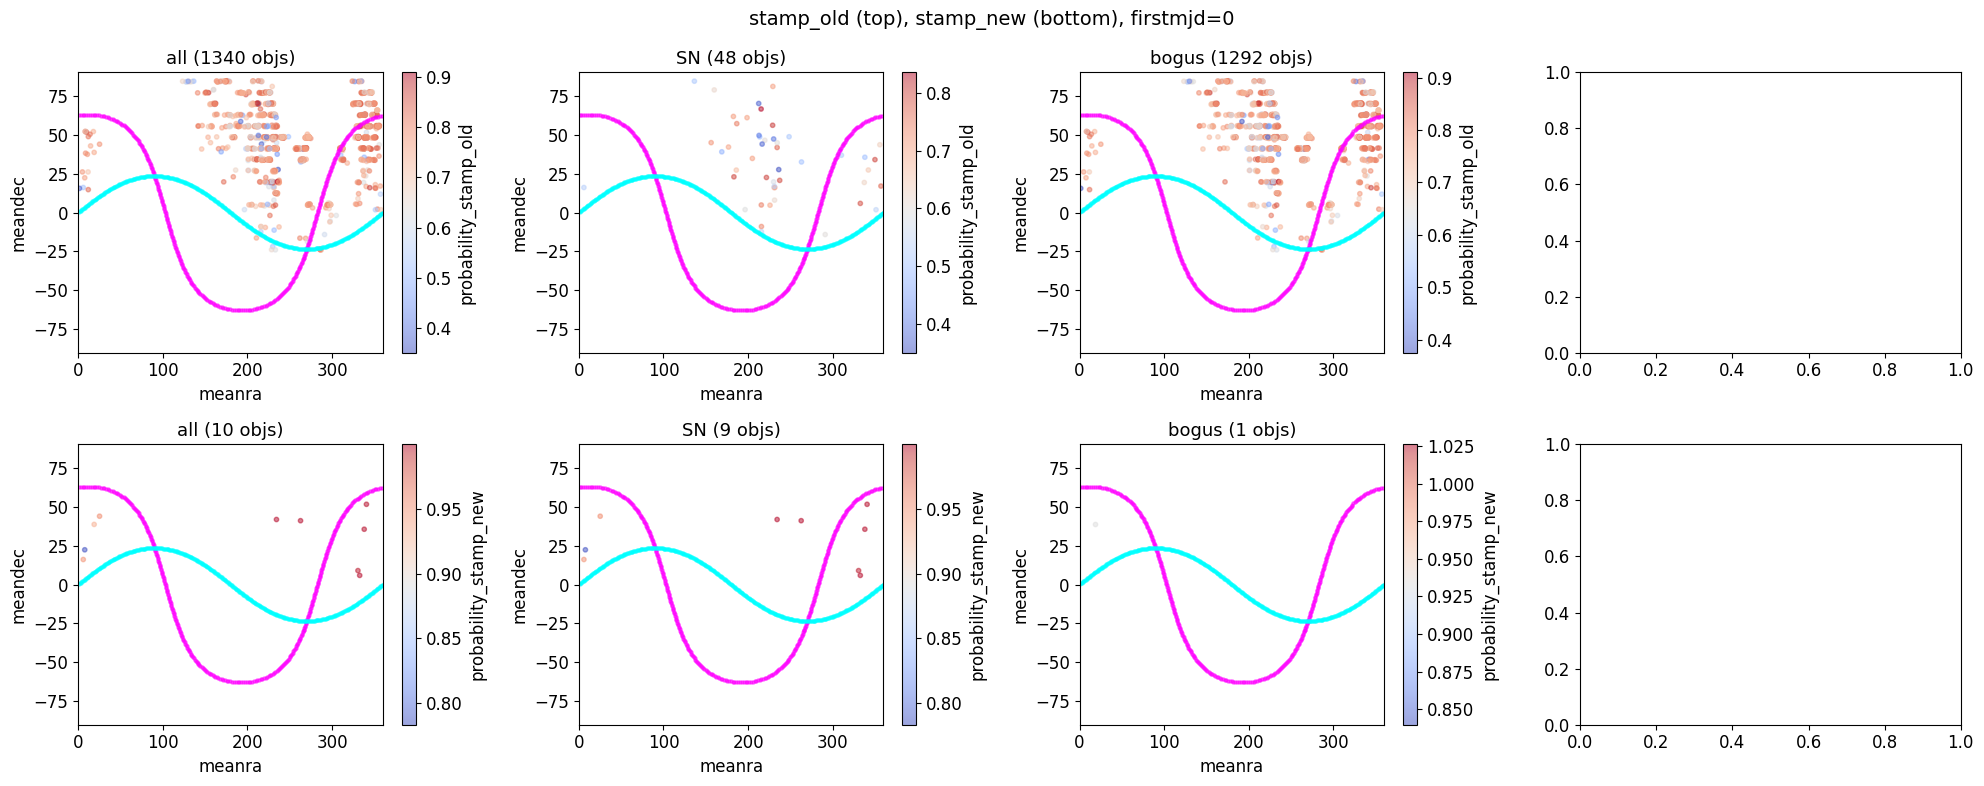

In [20]:
cls_aux = ['all', 'SN', 'bogus', 'satellite']
plot_2distribs_radecprob(df=df_final_og, cls=cls_aux,
                            firstmjd_min='0', fontsize=fontsize,gal_plane_ra=gal_plane_ra
                             ,gal_plane_dec=gal_plane_dec,ecl_plane_ra=ecl_plane_ra, ecl_plane_dec=ecl_plane_dec)

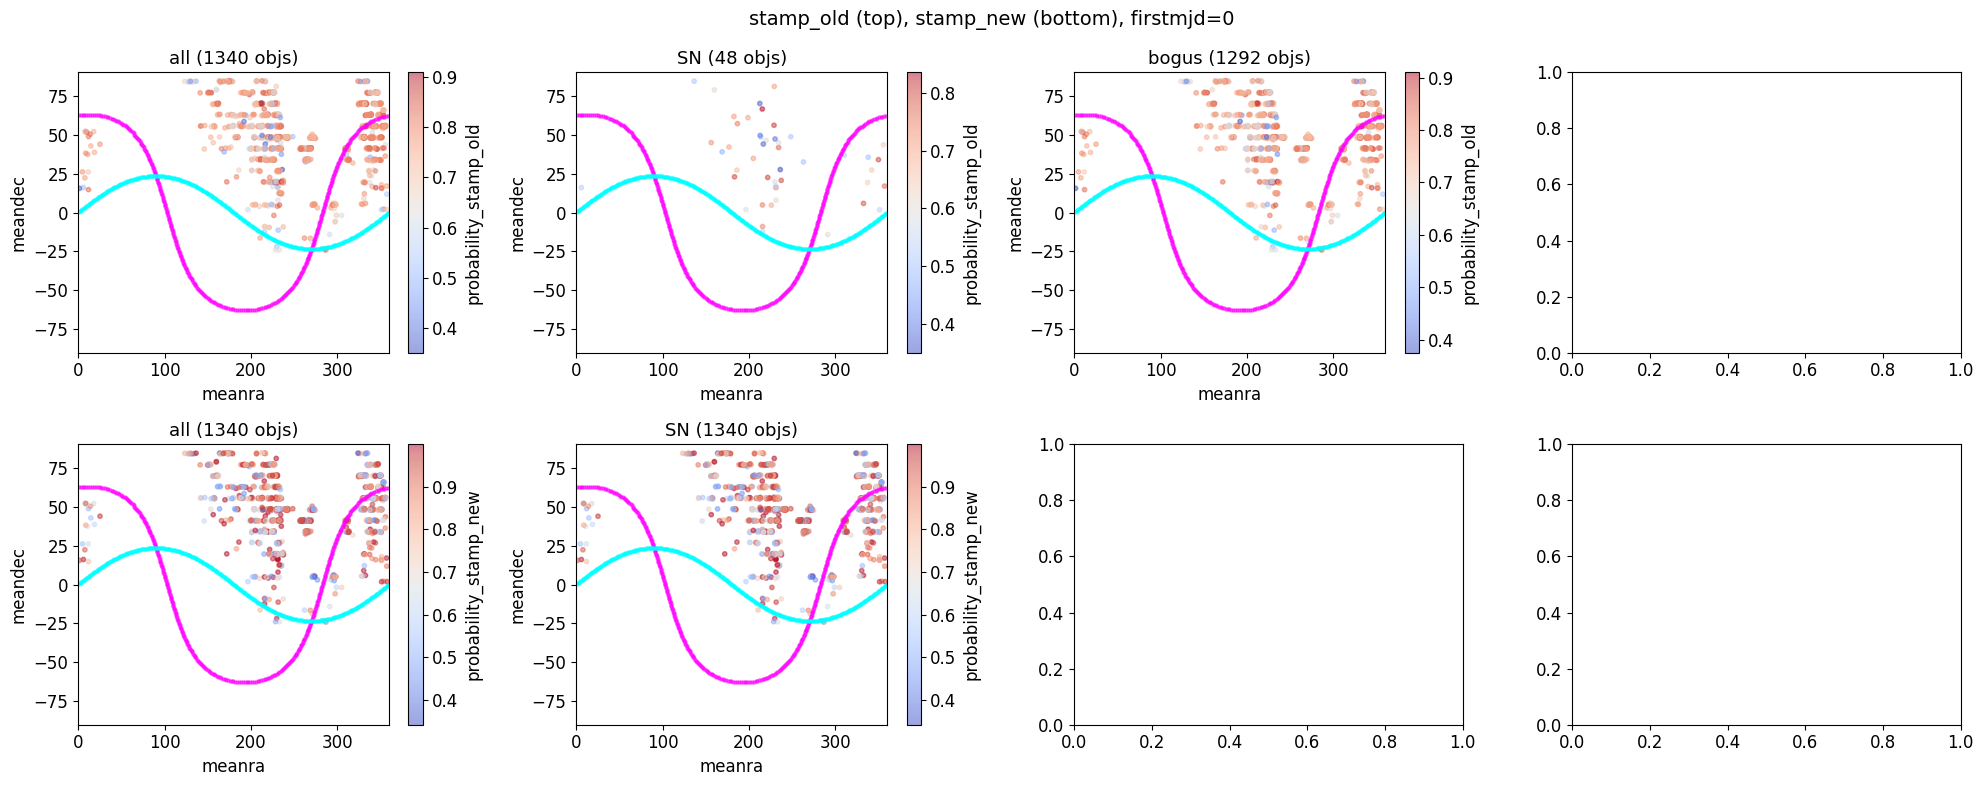

In [ ]:
cls_aux = ['all', 'SN', 'bogus', 'satellite']
fontsize = 12
plot_2distribs_radecprob(df=df_og, cls=cls_aux,
                         firstmjd_min='0', fontsize=fontsize,gal_plane_ra=gal_plane_ra
                          ,gal_plane_dec=gal_plane_dec,ecl_plane_ra=ecl_plane_ra, ecl_plane_dec=ecl_plane_dec)

## Con Metadatos

In [24]:
import pandas as pd

data = {
    'chinr': 1.276762,
    'classtar': -15.992573,
    'dec': 24.557728,
    'diffmaglim': 2.940792,
    'distpsnr1': 5.011400,
    'distpsnr2': 11.236211,
    'distpsnr3': 13.955814,
    'ecl_lat': 24.089291,
    'ecl_long': 165.049949,
    'fwhm': -14.508544,
    'gal_b': 15.701868,
    'gal_l': 141.581052,
    'isdiffpos': -16.392483,
    'magpsf': 1.706330,
    'ncovhist': 770.020550,
    'ndethist': -7.818360,
    'non_detections': 645.999121,
    'ra': 183.489901,
    'sgscore1': 0.592215,
    'sgscore2': 0.449422,
    'sgscore3': 0.392349,
    'sharpnr': -0.036260,
    'sigmapsf': -16.736783
}

means = pd.Series(data)
print(means)

data2 = {
    'chinr': 1.474401,
    'classtar': 128.886498,
    'dec': 25.694754,
    'diffmaglim': 131.370326,
    'distpsnr1': 6.315172,
    'distpsnr2': 7.227138,
    'distpsnr3': 8.002099,
    'ecl_lat': 29.776543,
    'ecl_long': 98.112176,
    'fwhm': 129.085305,
    'gal_b': 37.355342,
    'gal_l': 82.527217,
    'isdiffpos': 128.836846,
    'magpsf': 131.213323,
    'ncovhist': 756.358443,
    'ndethist': 130.265775,
    'non_detections': 625.351586,
    'ra': 99.249450,
    'sgscore1': 0.460625,
    'sgscore2': 0.471171,
    'sgscore3': 0.559422,
    'sharpnr': 0.250471,
    'sigmapsf': 128.788848
}

stds = pd.Series(data2)
print(stds)

chinr               1.276762
classtar          -15.992573
dec                24.557728
diffmaglim          2.940792
distpsnr1           5.011400
distpsnr2          11.236211
distpsnr3          13.955814
ecl_lat            24.089291
ecl_long          165.049949
fwhm              -14.508544
gal_b              15.701868
gal_l             141.581052
isdiffpos         -16.392483
magpsf              1.706330
ncovhist          770.020550
ndethist           -7.818360
non_detections    645.999121
ra                183.489901
sgscore1            0.592215
sgscore2            0.449422
sgscore3            0.392349
sharpnr            -0.036260
sigmapsf          -16.736783
dtype: float64
chinr               1.474401
classtar          128.886498
dec                25.694754
diffmaglim        131.370326
distpsnr1           6.315172
distpsnr2           7.227138
distpsnr3           8.002099
ecl_lat            29.776543
ecl_long           98.112176
fwhm              129.085305
gal_b              37.355342

In [25]:
df_metadata.isna().sum()

candid            0
ra                0
dec               0
gal_l             0
gal_b             0
ecl_long          0
ecl_lat           0
magpsf            0
sigmapsf          0
isdiffpos         0
diffmaglim        0
classtar          0
fwhm              0
sgscore1          0
sgscore2          0
sgscore3          0
distpsnr1         0
distpsnr2         0
distpsnr3         0
ndethist          0
ncovhist          0
chinr             0
sharpnr           0
non_detections    0
dtype: int64

In [26]:
df_md_processed = df_metadata.fillna(-999)
clipping_rules = {
    'sgscore1': (-1, None),
    'distpsnr1': (-1, None),
    'sgscore2': (-1, None),
    'distpsnr2': (-1, None),
    'sgscore3': (-1, None),
    'distpsnr3': (-1, None),
    'fwhm': (None, 10),
    'ndethist': (None, 20),
    'ncovhist': (None, 3000),
    'chinr': (-1, 15),
    'sharpnr': (-1, 1.5),
    'non_detections': (None, 2000)
}

for feature, (min_val, max_val) in clipping_rules.items():
    if feature in df_md_processed.columns:
        if min_val is not None:
            df_md_processed[feature] = df_md_processed[feature].clip(lower=min_val)
        if max_val is not None:
            df_md_processed[feature] = df_md_processed[feature].clip(upper=max_val)

features = df_metadata.columns.difference(['oid', 'candid'])
df_md_processed[features] = (df_md_processed[features] - means) / stds
df_md_processed

/tmp/ipykernel_2718346/11530490.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_md_processed = df_metadata.fillna(-999)


,candid,ra,dec,gal_l,gal_b,ecl_long,ecl_lat,magpsf,sigmapsf,isdiffpos,...,sgscore2,sgscore3,distpsnr1,distpsnr2,distpsnr3,ndethist,ncovhist,chinr,sharpnr,non_detections
oid,,,,,,,,,,,,,,,,,,,,,
ZTF25aaqqncg,3060493982415015031,-1.595342,0.751200,-0.113331,-0.905482,-1.269792,0.229333,0.119486,0.130703,0.134996,...,0.107345,0.192433,-0.268929,-0.214677,-0.012649,0.067695,2.948310,1.430573,2.093097,2.165183
ZTF25aaqqmcb,3060489134115015002,-1.659546,0.546450,-0.164603,-1.063889,-1.346742,0.137492,0.130607,0.131444,0.134996,...,1.103268,1.075040,-0.117347,-0.449069,1.062369,0.067695,-0.604238,-0.473251,0.013015,-0.534098
ZTF25aaqqlys,3060486282515015002,-1.771789,-0.087894,-0.302756,-1.499580,-1.518675,-0.224329,0.133093,0.131441,0.134996,...,0.848142,-0.701347,-0.706052,-0.498125,0.507443,0.067695,1.642051,-0.162617,0.396293,2.165183
ZTF19abjarlo,3060484674715015004,-1.789295,-0.330875,-0.343471,-1.659551,-1.561400,-0.393153,0.132481,0.131432,0.134996,...,0.107345,-0.503523,-0.655746,-1.182706,-1.198975,0.213551,1.665850,-0.128704,0.336406,2.034057
ZTF25aaqpzbl,3060420913315015010,1.503384,-0.727637,-0.900966,-1.465812,1.751043,-0.272581,0.129057,0.130636,0.134996,...,-0.730928,0.148244,-0.097348,-0.543067,-0.697189,0.067695,1.021975,4.796686,4.009486,1.432795
ZTF25aarqnde,3065414971315015002,1.482758,-0.607537,-0.887266,-1.369911,1.742986,-0.151138,0.135576,0.131427,0.134996,...,1.155621,0.192433,-0.568303,0.296597,0.716267,0.106078,2.948310,3.751515,2.404510,2.165183
ZTF25aaqqahc,3060424785415015007,1.557474,0.425796,-0.583212,-0.936586,1.949941,0.561964,0.137230,0.131546,0.134996,...,0.989015,-0.696431,-0.632539,-0.513888,0.193353,0.067695,2.884848,1.152494,0.783564,2.165183
ZTF25aaqqcld,3060429961415015017,1.583988,1.048701,-0.461981,-0.592654,-1.562148,0.974983,0.135147,0.131295,0.134996,...,0.240789,0.455863,-0.412134,-0.949420,-1.128292,0.075372,2.948310,-0.520050,-0.474067,2.165183
ZTF25aaqoygq,3060330283915015011,0.798839,0.639473,-0.913110,0.436069,0.941677,1.344148,0.141557,0.131636,0.134996,...,0.107345,-0.657775,-0.595417,-1.259050,-1.450333,0.067695,2.948310,0.229407,0.532038,2.165183


In [28]:
import tensorflow as tf
import pandas as pd

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import Model
from typing import List, Dict

def add_center_mask(im, center_size=8):
    """
    im: tensor [batch, 63, 63, 6]
    center_size: tamaño del cuadrado central (8 por defecto)
    returns: tensor [batch, 63, 63, 7]
    """
    batch_size, h, w, _ = im.shape

    # Coordenadas para el centro
    start_h = (h - center_size) // 2
    end_h = start_h + center_size
    start_w = (w - center_size) // 2
    end_w = start_w + center_size

    # Crear máscara [63, 63] con ceros
    mask = tf.zeros((h, w), dtype=tf.float32)

    # Poner 1s en la región central
    ones_center = tf.ones((center_size, center_size), dtype=tf.float32)
    mask = tf.tensor_scatter_nd_update(
        mask,
        indices=tf.reshape(tf.stack(tf.meshgrid(
            tf.range(start_h, end_h),
            tf.range(start_w, end_w),
            indexing="ij"
        ), axis=-1), [-1, 2]),
        updates=tf.reshape(ones_center, [-1])
    )

    # Expandir y replicar la máscara para el batch
    mask = tf.expand_dims(mask, axis=0)  # [1, 63, 63]
    mask = tf.tile(mask, [batch_size, 1, 1])  # [batch, 63, 63]
    mask = tf.expand_dims(mask, axis=-1)  # [batch, 63, 63, 1]

    # Concatenar como nuevo canal
    im_with_mask = tf.concat([im, mask], axis=-1)  # [batch, 63, 63, 7]
    im_with_mask = im[:,start_h:end_h, start_w:end_w, :]  # [batch, 8, 8, 6]
    return im_with_mask

import tensorflow as tf
import math

def positional_encoding_ra_dec(ra_deg, dec_deg, embedding_size=32):
    """
    Positional encoding sinusoidal con dimensión fija para coordenadas RA/DEC.

    Args:
        ra_deg: tensor [batch] o [batch, 1] con RA en grados (0 a 360)
        dec_deg: tensor [batch] o [batch, 1] con DEC en grados (-90 a +90)
        embedding_size: dimensión total del encoding (debe ser par)

    Returns:
        pe: tensor [batch, embedding_size]
    """
    assert embedding_size % 2 == 0, "embedding_size debe ser par"

    half_dim = embedding_size // 2
    ra_dim = half_dim // 2
    dec_dim = half_dim - ra_dim  # en caso de número impar

    # Convertir a radianes
    ra_rad = tf.expand_dims(ra_deg * math.pi / 180.0, -1)  # [batch, 1]
    dec_rad = tf.expand_dims(dec_deg * math.pi / 180.0, -1)

    # Frecuencias tipo transformer
    ra_freqs = tf.pow(10000.0, tf.range(0, ra_dim, dtype=tf.float32) / ra_dim)  # [ra_dim]
    dec_freqs = tf.pow(10000.0, tf.range(0, dec_dim, dtype=tf.float32) / dec_dim)

    ra_scaled = ra_rad / ra_freqs  # [batch, ra_dim]
    dec_scaled = dec_rad / dec_freqs

    ra_pe = tf.concat([tf.sin(ra_scaled), tf.cos(ra_scaled)], axis=-1)  # [batch, 2 * ra_dim]
    dec_pe = tf.concat([tf.sin(dec_scaled), tf.cos(dec_scaled)], axis=-1)  # [batch, 2 * dec_dim]

    pe = tf.concat([ra_pe, dec_pe], axis=-1)  # [batch, embedding_size]

    return pe



class StampModelFull(Model):
    def __init__(
            self,
            layer_sizes: List[int], 
            dropout_rate: float,
            with_batchnorm: bool, 
            first_kernel_size: int, 
            dict_mapping_classes: int,
            order_features: List[str] = None,
            #norm_means: pd.Series = None,
            #norm_stds: pd.Series = None,
            **kwargs):
        super().__init__(**kwargs)

        self.layer_sizes = layer_sizes
        self.dropout_rate = dropout_rate
        self.with_batchnorm = with_batchnorm
        self.first_kernel_size = first_kernel_size
        self.dict_mapping_classes = dict_mapping_classes
        self.order_features = order_features if order_features is not None else []
        #self.norm_means = norm_means
        #self.norm_stds = norm_stds
        n_classes = len(dict_mapping_classes)

        self.conv_1 = Conv2D(
            32, (first_kernel_size, first_kernel_size),
            activation='relu', padding='same',
            kernel_initializer=tf.keras.initializers.HeUniform())
        self.pool_1 = MaxPooling2D((2, 2), padding='same')
        self.conv_2 = Conv2D(
            32, (3, 3),
            activation='relu', padding='same',
            kernel_initializer=tf.keras.initializers.HeUniform())
        self.pool_2 = MaxPooling2D((2, 2))
        self.conv_3 = Conv2D(
            64, (3, 3),
            activation='relu', padding='same',
            kernel_initializer=tf.keras.initializers.HeUniform())
        self.pool_3 = MaxPooling2D((2, 2))
        self.conv_4 = Conv2D(
            64, (3, 3),
            activation='relu', padding='same',
            kernel_initializer=tf.keras.initializers.HeUniform())
        
        self.conv_5 = Conv2D(
            64, (3, 3),
            activation='relu', padding='same',
            kernel_initializer=tf.keras.initializers.HeUniform())


        self.with_batchnorm = with_batchnorm
        if self.with_batchnorm:
            self.bn = BatchNormalization()

        self.flatten = Flatten()
        self.dropout = Dropout(dropout_rate)
        self.dense_1 = Dense(layer_sizes[4], activation='tanh')
        self.dense_2 = Dense(n_classes)

    def call(self, inputs, training=False):
        x, pos = inputs[0], inputs[1]
        rot_list = [x, tf.image.rot90(x), tf.image.rot90(x, k=2), tf.image.rot90(x, k=3)]

        for i in range(4):
            rot_list.append(tf.image.flip_up_down(rot_list[i]))

        output_list = []
        for im in rot_list:
            im = add_center_mask(im, center_size=23)
            x = self.conv_1(im)
            x = self.conv_2(x)
            x = self.pool_1(x)
            x = self.conv_3(x)
            x = self.conv_4(x)
            x = self.conv_5(x)
            x = self.pool_2(x)
            """x = self.conv_1(im)
            x = self.pool_1(x)

            x = self.conv_2(x)
            x = self.pool_2(x)

            x = self.conv_3(x)
            x = self.pool_3(x)

            x = self.conv_4(x)"""

            x = self.flatten(x)
            output_list.append(x)

        x = tf.stack(output_list, axis=0)
        x = tf.reduce_mean(x, axis=0)

        x = self.dropout(x, training=training)

        if self.with_batchnorm:
            pos = self.bn(pos, training=training)
        #print(pos.shape)

        #dec = pos[:,2]
        #ra = pos[:,17]
        #pe = positional_encoding_ra_dec(ra, dec, x.shape[1])
        #x = x+pe
        #pos = tf.concat([pos[:,:2],pos[:,3:17],pos[:,18:]],axis=1)
        

        x = tf.concat([x, pos], axis=1)
        x = self.dense_1(x)
        x = self.dense_2(x)

        return x

    def get_config(self) -> Dict:
        """ Devuelve la configuración del modelo para su serialización """
        config = super().get_config()
        config.update({
            "layer_sizes": self.layer_sizes,
            "dropout_rate": self.dropout_rate,
            "with_batchnorm": self.with_batchnorm,
            "first_kernel_size": self.first_kernel_size,
            "dict_mapping_classes": self.dict_mapping_classes,
            "order_features": self.order_features,
            #"norm_means": self.norm_means,
            #"norm_stds": self.norm_stds
        })
        return config

    @classmethod
    def from_config(cls, config: Dict):
        """ Permite reconstruir el modelo desde la configuración """
        return cls(**config)

model_md = tf.keras.models.load_model(
    r'./model_fran.keras', 
    custom_objects={"StampModelFull": StampModelFull}
)

In [29]:
model_md.order_features

['chinr',
 'classtar',
 'dec',
 'diffmaglim',
 'distpsnr1',
 'distpsnr2',
 'distpsnr3',
 'ecl_lat',
 'ecl_long',
 'fwhm',
 'gal_b',
 'gal_l',
 'isdiffpos',
 'magpsf',
 'ncovhist',
 'ndethist',
 'non_detections',
 'ra',
 'sgscore1',
 'sgscore2',
 'sgscore3',
 'sharpnr',
 'sigmapsf']

In [30]:
dict_classes_training_to_prod = {
    "agn": "AGN",
    "asteroid": "asteroid",
    "bogus": "bogus",
    "satellite": "satellite",
    "sn": "SN",
    "vs": "VS",
}

class_names = [
    dict_classes_training_to_prod[model_md.dict_mapping_classes[i]]
    for i in sorted(model_md.dict_mapping_classes.keys())
]
class_names

['AGN', 'asteroid', 'bogus', 'satellite', 'SN', 'VS']

In [31]:
input_data, pos_data, aid_index, asteroids = model_ig.mapper.preprocess(input_dto.stamps, class_names)

probs = []
if input_data is not None:
    with tf.device("/cpu:0"):
        probs = tf.nn.softmax(model_md((input_data, df_md_processed[model_md.order_features].values)))

pred_prob_md = model_ig.mapper.postprocess(
    probs, 
    asteroids=asteroids,
    stamps=input_dto.stamps,
    taxonomy=class_names,
    index=aid_index,
    ).probabilities

pred_prob_md

,AGN,asteroid,bogus,satellite,SN,VS
oid,,,,,,
ZTF25aaqqncg,0.133043,1.359268e-06,0.356747,0.002710,0.507072,0.000426
ZTF25aaqqmcb,0.001361,9.902198e-02,0.886135,0.000356,0.000194,0.012931
ZTF25aaqqlys,0.144264,5.158337e-06,0.574846,0.179059,0.100579,0.001247
ZTF19abjarlo,0.192238,3.613641e-07,0.050387,0.007912,0.742853,0.006609
ZTF25aaqpzbl,0.000258,8.271118e-06,0.274167,0.025307,0.700224,0.000034
ZTF25aarqnde,0.596564,2.838353e-07,0.227792,0.036925,0.136479,0.002240
ZTF25aaqqahc,0.480754,7.980840e-07,0.301582,0.067801,0.146122,0.003741
ZTF25aaqqcld,0.021497,5.698250e-06,0.413980,0.318524,0.225271,0.020721
ZTF25aaqoygq,0.003197,2.489188e-06,0.157032,0.381502,0.457651,0.000615


### Gráficos con metadatos

In [32]:
df_aux = df_og.set_index('oid').drop(['class_name_stamp_new','classifier_name_stamp_new',
                                       'classifier_version_stamp_new','probability_stamp_new'],axis=1)
# Obtener predicciones
preds = find_probs_r1(oids=[oid.strip("'") for oid in oids],pred_df = pred_prob_md)
# Hacer join por índice (oid)
df_final = df_aux.join(preds, how='left')
df_final

,ndet,meanra,meandec,deltajd,firstmjd,lastmjd,step_id_corr,class_name_stamp_old,classifier_name_stamp_old,classifier_version_stamp_old,probability_stamp_old,class_name_stamp_new,classifier_name_stamp_new,classifier_version_stamp_new,probability_stamp_new
oid,,,,,,,,,,,,,,,
ZTF25aaqqncg,25,25.153132,43.859619,9.996597,60814.493982,60824.490579,27.5.6,bogus,stamp_classifier,stamp_classifier_1.0.4,0.783749,SN,stamp,stamp_classifier_1.0.4,0.507072
ZTF25aaqqmcb,9,18.780834,38.598613,9.996424,60814.489132,60824.485556,27.5.6,bogus,stamp_classifier,stamp_classifier_1.0.4,0.748484,bogus,stamp,stamp_classifier_1.0.4,0.886135
ZTF25aaqqlys,28,7.640684,22.299256,9.991875,60814.486285,60824.478160,27.5.6,bogus,stamp_classifier,stamp_classifier_1.0.4,0.759786,bogus,stamp,stamp_classifier_1.0.4,0.574846
ZTF19abjarlo,26,5.903281,16.055791,9.999711,60814.477986,60824.477697,27.5.6,SN,stamp_classifier,stamp_classifier_1.0.4,0.526442,SN,stamp,stamp_classifier_1.0.4,0.742853
ZTF25aaqpzbl,9,332.699920,5.861327,10.040845,60814.420914,60824.461759,27.5.6,SN,stamp_classifier,stamp_classifier_1.0.4,0.792763,SN,stamp,stamp_classifier_1.0.4,0.700224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF25aaqomrj,1,157.446580,55.765790,0.000000,60814.278750,60814.278750,27.5.6,bogus,stamp_classifier,stamp_classifier_1.0.4,0.733461,NaN,NaN,NaN,NaN
ZTF25aaqompw,1,156.835737,55.414955,0.000000,60814.278750,60814.278750,27.5.6,bogus,stamp_classifier,stamp_classifier_1.0.4,0.756680,NaN,NaN,NaN,NaN
ZTF25aaqomnq,1,153.893988,55.137045,0.000000,60814.278750,60814.278750,27.5.6,bogus,stamp_classifier,stamp_classifier_1.0.4,0.695921,NaN,NaN,NaN,NaN


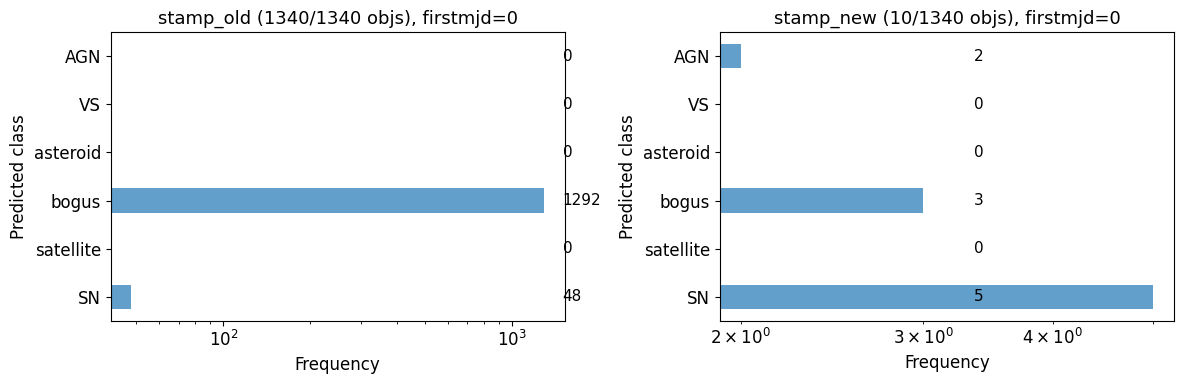

In [33]:
cls_sort_new = ['SN', 'satellite', 'bogus', 'asteroid', 'VS', 'AGN']
cls_map_sort_new = find_cl_map(cls_sort_new)
fontsize = 12
plot_2distribs_cls(df=df_final, labels_pred_map=cls_map_sort_new, fontsize=fontsize,firstmjd_min='0')

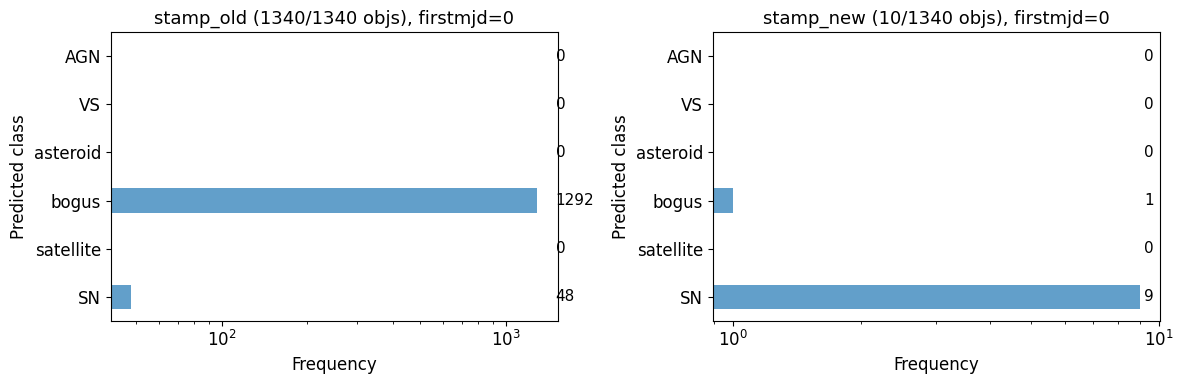

In [34]:
cls_sort_new = ['SN', 'satellite', 'bogus', 'asteroid', 'VS', 'AGN']
cls_map_sort_new = find_cl_map(cls_sort_new)
fontsize = 12
plot_2distribs_cls(df=df_final_og, labels_pred_map=cls_map_sort_new, fontsize=fontsize,firstmjd_min='0')

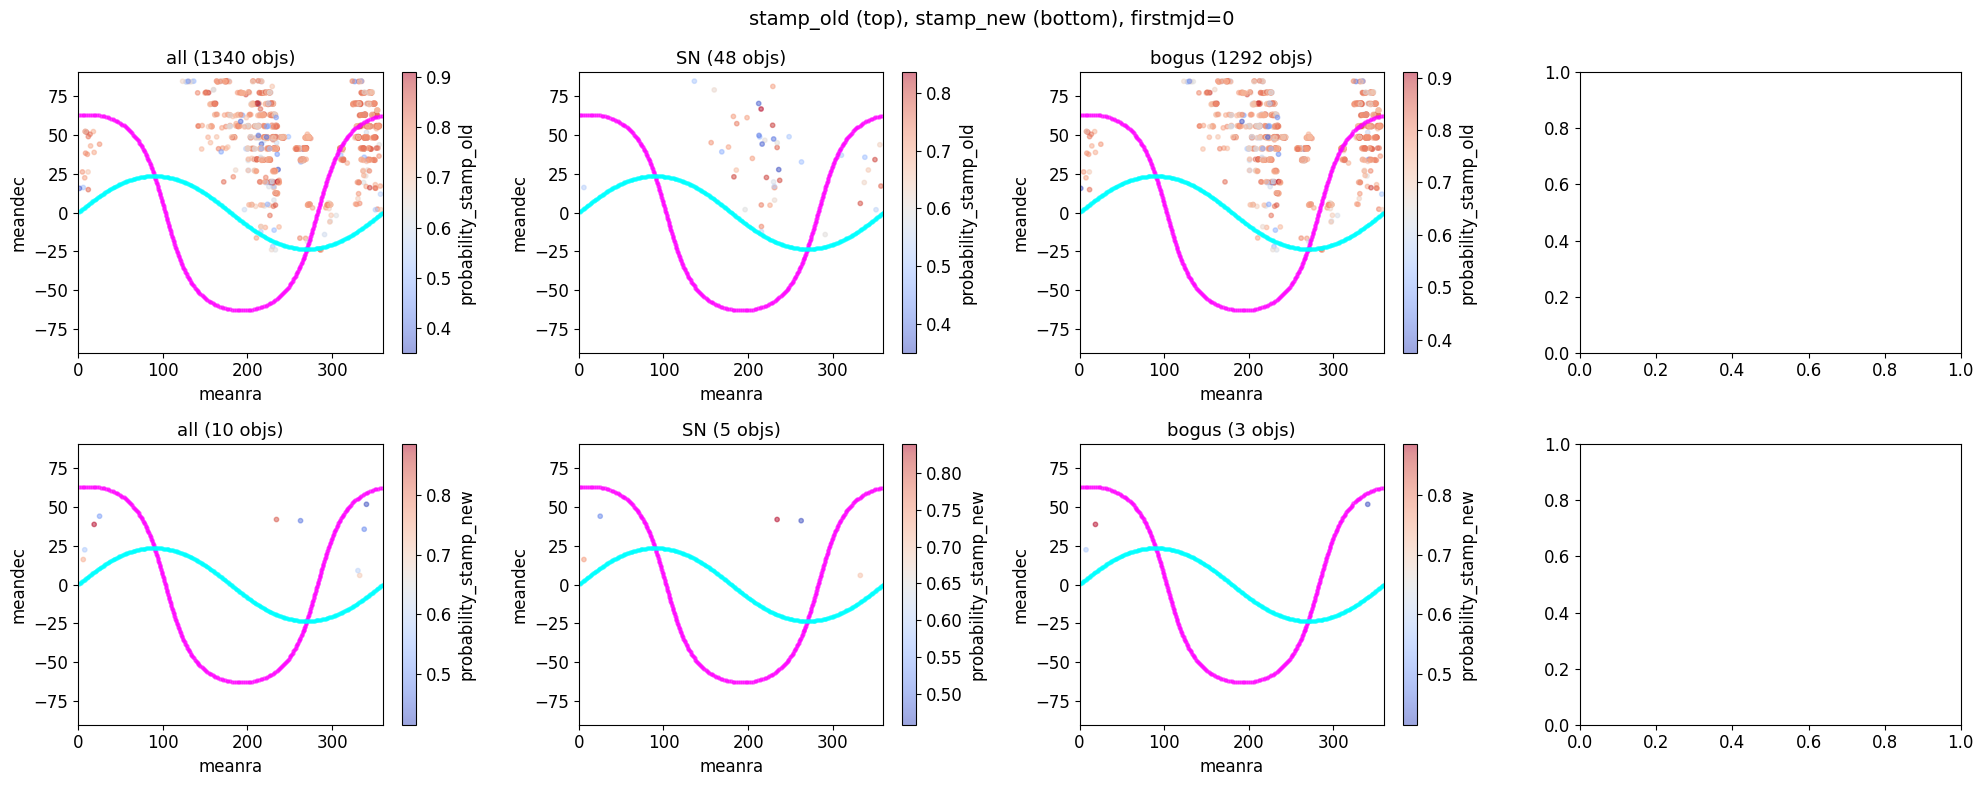

In [35]:
cls_aux = ['all', 'SN', 'bogus', 'satellite']
plot_2distribs_radecprob(df=df_final, cls=cls_aux,
                            firstmjd_min='0', fontsize=fontsize,gal_plane_ra=gal_plane_ra
                             ,gal_plane_dec=gal_plane_dec,ecl_plane_ra=ecl_plane_ra, ecl_plane_dec=ecl_plane_dec)

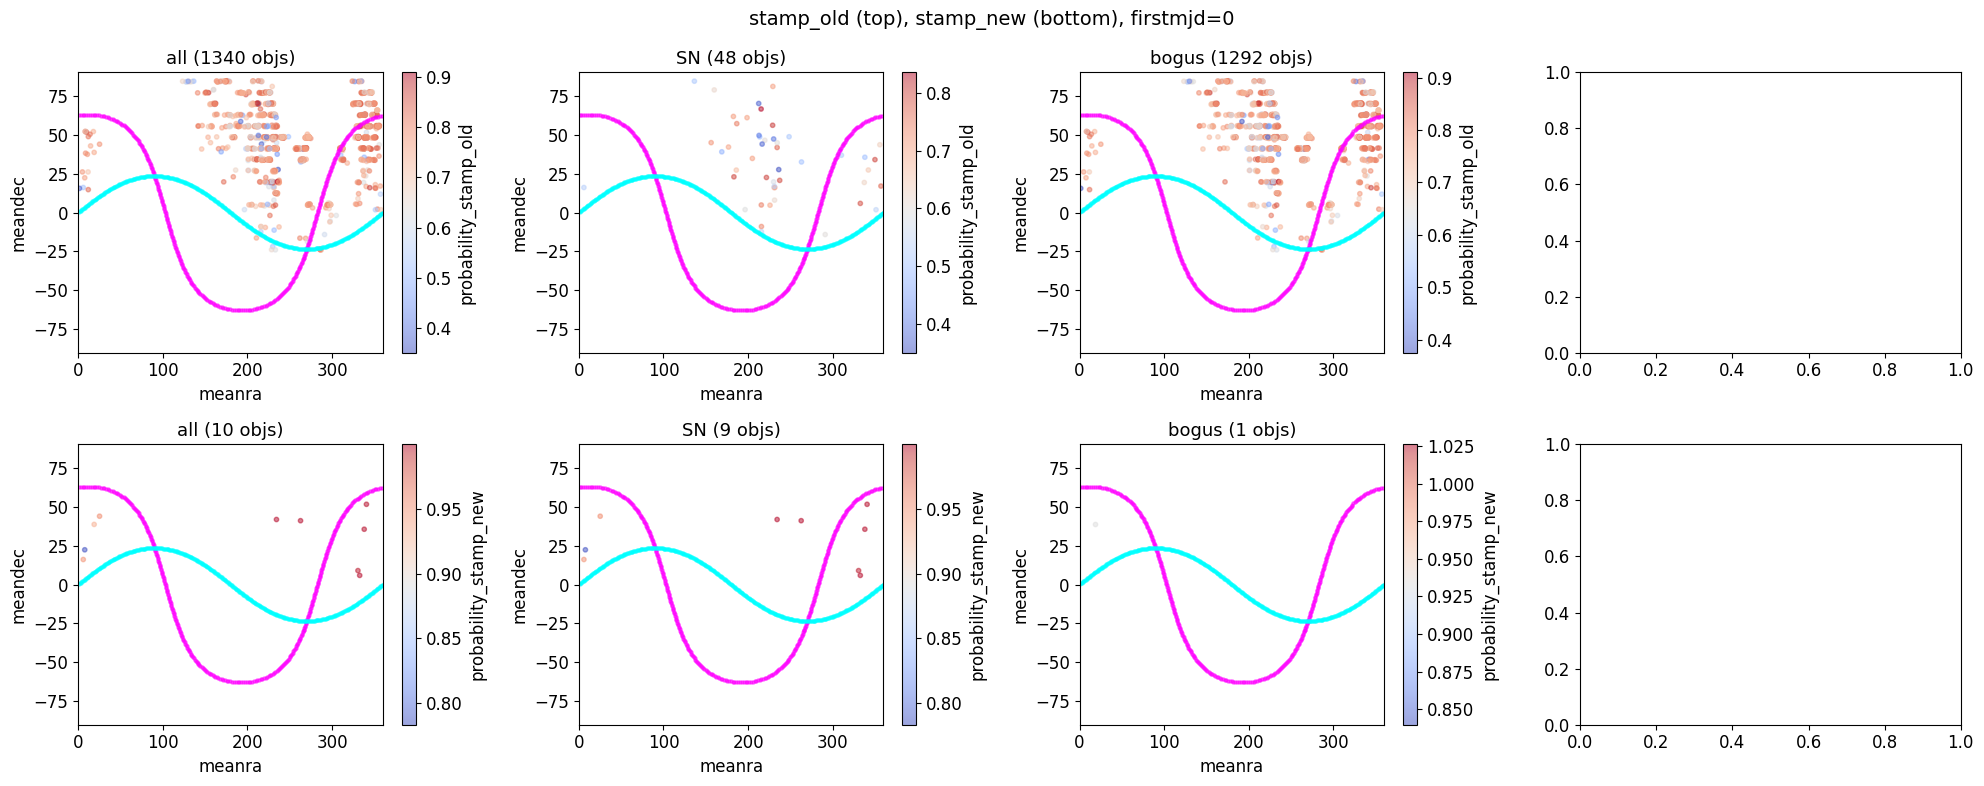

In [36]:
cls_aux = ['all', 'SN', 'bogus', 'satellite']
plot_2distribs_radecprob(df=df_final_og, cls=cls_aux,
                            firstmjd_min='0', fontsize=fontsize,gal_plane_ra=gal_plane_ra
                             ,gal_plane_dec=gal_plane_dec,ecl_plane_ra=ecl_plane_ra, ecl_plane_dec=ecl_plane_dec)